In [1]:
#TF estimators are used for basic ml problems .TF estimators begin from cell 16

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\demongking28\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.random.seed(15)
x_train=np.linspace(0.0,20.0,10000)
y_train=0.4*x_train+5+np.random.randn(len(x_train))



In [3]:
x_df= pd.DataFrame(data=x_train,columns=["x_train"])
y_df= pd.DataFrame(data=y_train,columns=["y_train"])

data=pd.concat([x_df,y_df],axis=1)

data.tail(5)

,x_train,y_train
9995,19.991999,11.150235
9996,19.993999,13.345124
9997,19.996000,13.750383
9998,19.998000,12.178902
9999,20.000000,12.965469


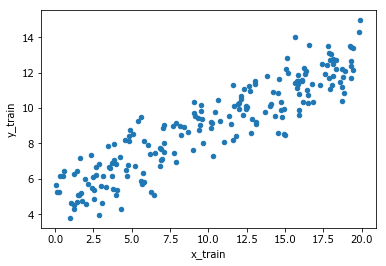

In [4]:
data.sample(n=200).plot(kind="Scatter",x="x_train",y="y_train")

In [5]:
batch_size=8
#starting with random values of m and b
init_m,init_b=np.random.randn(2)

print(init_m,init_b)

0.2182674539905923 -0.4109167926873046


In [6]:

#variables
m=tf.Variable(0.21)
b=tf.Variable(0.41)

In [7]:
#placeholders

x_place=tf.placeholder(tf.float32,shape=[batch_size])
y_place=tf.placeholder(tf.float32,shape=[batch_size])

In [8]:
y_pred=m*x_place+b

In [9]:
print(y_pred.shape)
print(y_place.shape)

(8,)
(8,)


In [10]:
error=tf.reduce_sum(tf.square(y_place-y_pred)) #default axis =None reduces across all dimensions

In [11]:
optim=tf.train.GradientDescentOptimizer(learning_rate=0.00001)

In [12]:
result=optim.minimize(error)
init_op=tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(50000):
        
        indexes=np.random.randint(len(x_train),size=8)
        
        dictor={x_place:x_train[indexes],y_place:y_train[indexes]}
        
        sess.run(result,feed_dict=dictor)
        #print(sess.run(m))
    slop,intercep=sess.run([m,b])

print(slop,intercep)

0.4459858 4.361905


In [14]:
plotter=slop*x_train+intercep

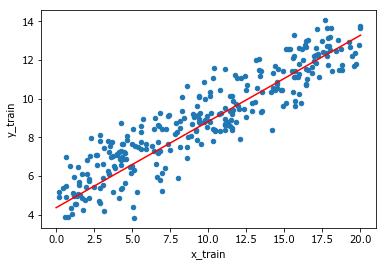

In [15]:

data.sample(n=300).plot(kind="scatter",x="x_train",y="y_train")
plt.plot(x_train,plotter,c="red")


In [17]:
#Step 1
feature_column=[tf.feature_column.numeric_column(key='x',shape=[1])]

In [18]:
#step 2
estimator=tf.estimator.LinearRegressor(feature_column)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DEMONG~1\\AppData\\Local\\Temp\\tmpavqz7a3g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C6BA40CA90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train_1,x_test,y_train_1,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [24]:
#step3

inputs=tf.estimator.inputs.numpy_input_fn({'x':x_train_1},y_train_1,batch_size=8,num_epochs=None,shuffle=True)

In [25]:
#this is for training notice num_epochs=5000 and shuffle is set to false
inputs_train=tf.estimator.inputs.numpy_input_fn({'x':x_train_1},y_train_1,batch_size=8,num_epochs=5000,shuffle=False)

In [27]:
#for testing
inputs_test=tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=5000,shuffle=False)

In [28]:
#starting training 

estimator.train(inputs,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\DEMONG~1\AppData\Local\Temp\tmpavqz7a3g\model.ckpt.
INFO:tensorflow:loss = 935.79034, step = 1
INFO:tensorflow:global_step/sec: 513.589
INFO:tensorflow:loss = 36.28276, step = 101 (0.215 sec)
INFO:tensorflow:global_step/sec: 610.008
INFO:tensorflow:loss = 33.081253, step = 201 (0.139 sec)
INFO:tensorflow:global_step/sec: 817.941
INFO:tensorflow:loss = 20.111671, step = 301 (0.117 sec)
INFO:tensorflow:global_step/sec: 836.969
INFO:tensorflow:loss = 8.523203, step = 401 (0.119 sec)
INFO:tensorflow:global_step/sec: 816.685
INFO:tensorflow:loss = 9.897858, step = 501 (0.122 sec)
INFO:tensorflow:global_step/sec: 767.368
INFO:tensorflow:loss = 6.7167664, step = 601 (0.133 sec)
INFO:tensorflow:global_step/

In [31]:
# see training metrics

train_metric=estimator.evaluate(input_fn=inputs_train,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-20:03:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpavqz7a3g\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [500/5000]
INFO:tensorflow:Evaluation [1000/5000]
INFO:tensorflow:Evaluation [1500/5000]
INFO:tensorflow:Evaluation [2000/5000]
INFO:tensorflow:Evaluation [2500/5000]
INFO:tensorflow:Evaluation [3000/5000]
INFO:tensorflow:Evaluation [3500/5000]
INFO:tensorflow:Evaluation [4000/5000]
INFO:tensorflow:Evaluation [4500/5000]
INFO:tensorflow:Evaluation [5000/5000]
INFO:tensorflow:Finished evaluation at 2018-06-23-20:03:12
INFO:tensorflow:Saving dict for global step 5000: average_loss = 1.0116074, global_step = 5000, loss = 8.092859


In [32]:
test_metric=estimator.evaluate(input_fn=inputs_test,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-20:03:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpavqz7a3g\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [500/5000]
INFO:tensorflow:Evaluation [1000/5000]
INFO:tensorflow:Evaluation [1500/5000]
INFO:tensorflow:Evaluation [2000/5000]
INFO:tensorflow:Evaluation [2500/5000]
INFO:tensorflow:Evaluation [3000/5000]
INFO:tensorflow:Evaluation [3500/5000]
INFO:tensorflow:Evaluation [4000/5000]
INFO:tensorflow:Evaluation [4500/5000]
INFO:tensorflow:Evaluation [5000/5000]
INFO:tensorflow:Finished evaluation at 2018-06-23-20:03:36
INFO:tensorflow:Saving dict for global step 5000: average_loss = 1.0090108, global_step = 5000, loss = 8.072086


In [33]:
print(train_metric)

{'average_loss': 1.0116074, 'loss': 8.092859, 'global_step': 5000}


In [34]:
print(test_metric)

{'average_loss': 1.0090108, 'loss': 8.072086, 'global_step': 5000}


In [48]:
#predicting from the trained model
predict_data=np.linspace(0,15,15)
input_predict=tf.estimator.inputs.numpy_input_fn({'x':predict_data},batch_size=15,shuffle=False)

In [49]:
#viewing the results
list(estimator.predict(input_fn=input_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpavqz7a3g\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.9657865], dtype=float32)},
 {'predictions': array([5.39916], dtype=float32)},
 {'predictions': array([5.832534], dtype=float32)},
 {'predictions': array([6.2659073], dtype=float32)},
 {'predictions': array([6.699281], dtype=float32)},
 {'predictions': array([7.132655], dtype=float32)},
 {'predictions': array([7.5660286], dtype=float32)},
 {'predictions': array([7.999402], dtype=float32)},
 {'predictions': array([8.4327755], dtype=float32)},
 {'predictions': array([8.86615], dtype=float32)},
 {'predictions': array([9.299523], dtype=float32)},
 {'predictions': array([9.732897], dtype=float32)},
 {'predictions': array([10.16627], dtype=float32)},
 {'predictions': array([10.599644], dtype=float32)},
 {'predictions': array([11.033018], dtype=float32)}]

In [50]:
results=[]

for i in estimator.predict(input_fn=input_predict):
    results.append(i["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpavqz7a3g\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


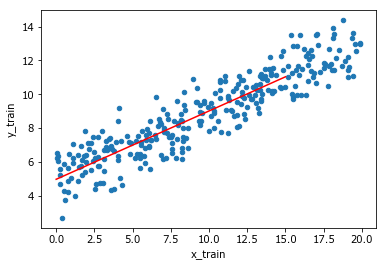

In [54]:
data.sample(n=300).plot(kind="scatter",x="x_train",y="y_train")
plt.plot(predict_data,results,c='red')